# Who Survived the Titanic?

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

[Source: Kaggle Competition Description](https://www.kaggle.com/c/titanic)

In this project, I'll start with taking an overview of the dataset and its content. Then, I'll make sure that the data are complete before invistigating the passengers' dataset further to test the above-mentioned assumption that women, children, and the upper-class were more likely to survive. In addition, I'll check if the availability of accompanying family members aboard effected the chance of survival. 

In [1]:
# importing the needed librires
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
# reading the datasheet (source: https://www.kaggle.com/c/titanic/data)
titanic = pd.read_csv('titanic-data.csv')

In [3]:
# cheking the shape of the data
titanic.shape

(891, 12)

So, there are 891 passengers included in the dataset (out of 2224) which represents around 40% of all passengers

In [4]:
# checking the first rows from the data to know how look like
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here is the descriptuion of the included columns (from [Kaggle](https://www.kaggle.com/c/titanic/data))

Survived: survived = 1 , died = 0	
Pclass: Ticket class (1st = 1, 2nd = 2, 3rd = 3)	
Sex: Sex	
Age: Age in years	
SibSp: # of siblings / spouses aboard the Titanic	
Parch: # of parents / children aboard the Titanic	
Ticket: Ticket number	
Fare: Passenger fare	
Cabin: Cabin number	
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In addition, there is also the PassengerId (Passenger ID) that can be used as an idintifer. Also, there is the Name, which includes the passenger's title.
Before starting to answering the question, I'll take a further look into the content of the datasheet

In [5]:
# checking the summary statistics for the 7 numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The first and most important observation is that the mean value for the Survived column is .38, which represnts 38% survival rate. But before going further into this, we need to check the columns that has missing values (the count for age is 714).

## Data Wrangling Phase

In [6]:
# checking the data type and number of non-null values of each column
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


This shows that there are 685 passengers without Cabin information, 177 without age and 2 without embarkation. So, before going further, I'll start with dealing with these missing values.

Because the most of the cabin information are missing and I suspect it didn't have a hugh influence on the survival, I'll drop it from the dataset.

In [7]:
# to keep the original data as is, I'll create a new df called updated_df to make the changes on it
updated_df = titanic.drop(['Cabin'],axis=1)
updated_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Age is suspected to be one of the factors that affected the outcome, so it's important to find a way to fill it for the missing value (177 represents around 20% of the dataset so I prefer not to delete them). So, I'll categorize the passengers based on their titles and replace missing ages with the median for each group.

In [8]:
def extract_title(Name):
    """Extracts the passenger's title that comes between the comma and the dot in his/her name"""
    start_title = Name.find(', ')
    end_title = Name.find('.')
    return Name[start_title + 1: end_title +1]

# apply the function on all rows and add a column named Title
updated_df['Title'] = updated_df['Name'].apply(extract_title)

In [9]:
# checking a sample of the added titles with corresponding names 
updated_df[['Name', 'Title']].sample(n=10)

,Name,Title
284,"Smith, Mr. Richard William",Mr.
88,"Fortune, Miss. Mabel Helen",Miss.
106,"Salkjelsvik, Miss. Anna Kristine",Miss.
806,"Andrews, Mr. Thomas Jr",Mr.
579,"Jussila, Mr. Eiriik",Mr.
72,"Hood, Mr. Ambrose Jr",Mr.
436,"Ford, Miss. Doolina Margaret ""Daisy""",Miss.
613,"Horgan, Mr. John",Mr.
248,"Beckwith, Mr. Richard Leonard",Mr.
768,"Moran, Mr. Daniel J",Mr.


In [10]:
# checking the frequancy of each title and where are the missing ages
updated_df.groupby('Title')['Name', 'Age'].count() 

,Name,Age
Title,,
Capt.,1,1
Col.,2,2
Don.,1,1
Dr.,7,6
Jonkheer.,1,1
Lady.,1,1
Major.,2,2
Master.,40,36
Miss.,182,146


All the ages for categories with less than 5 passengers are filled, so let's check if there is variation between the groupes' median age.

In [11]:
updated_df.groupby('Title')['Age'].median()

Title
 Capt.            70.0
 Col.             58.0
 Don.             40.0
 Dr.              46.5
 Jonkheer.        38.0
 Lady.            48.0
 Major.           48.5
 Master.           3.5
 Miss.            21.0
 Mlle.            24.0
 Mme.             24.0
 Mr.              30.0
 Mrs.             35.0
 Ms.              28.0
 Rev.             46.5
 Sir.             49.0
 the Countess.    33.0
Name: Age, dtype: float64

In [12]:
# identifing the rows with missing age
null_age = updated_df['Age'].isnull()
updated_df.loc[null_age == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr.
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr.
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,Mrs.
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Mr.
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,Miss.
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,Mr.
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,Mrs.
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,Miss.
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,Mr.
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C,Mr.


Now, will fill each missing age value with the median age for the same title.

In [13]:
# I couldn't find a way to code this so I searched and found an answer here: 
# https://stackoverflow.com/questions/41680089/how-to-fillna-by-groupby-outputs-in-pandas

updated_df['Age'] = updated_df.groupby('Title')['Age'].apply(lambda x: x.fillna(x.median()))

In [14]:
# checking a sample of the rows that had missing age value after using the median
updated_df.loc[null_age == True].sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
64,65,0,1,"Stewart, Mr. Albert A",male,30.0,0,0,PC 17605,27.7208,C,Mr.
107,108,1,3,"Moss, Mr. Albert Johan",male,30.0,0,0,312991,7.7750,S,Mr.
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,35.0,1,0,386525,16.1000,S,Mrs.
260,261,0,3,"Smith, Mr. Thomas",male,30.0,0,0,384461,7.7500,Q,Mr.
154,155,0,3,"Olsen, Mr. Ole Martin",male,30.0,0,0,Fa 265302,7.3125,S,Mr.
250,251,0,3,"Reed, Mr. James George",male,30.0,0,0,362316,7.2500,S,Mr.
425,426,0,3,"Wiseman, Mr. Phillippe",male,30.0,0,0,A/4. 34244,7.2500,S,Mr.
568,569,0,3,"Doharr, Mr. Tannous",male,30.0,0,0,2686,7.2292,C,Mr.
598,599,0,3,"Boulos, Mr. Hanna",male,30.0,0,0,2664,7.2250,C,Mr.
792,793,0,3,"Sage, Miss. Stella Anna",female,21.0,8,2,CA. 2343,69.5500,S,Miss.


In [15]:
# checking again number of missing values of each column
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The only data missing now is the Embarked cell in two rows, so let's check them

In [16]:
updated_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most of the passengers embarked from Southampton, so I'll assume it is the same for the 2 passengers

In [17]:
updated_df = updated_df.fillna('S')

In [18]:
# Now, let's check there are no remaining missing values
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now, we can have take a deeper look into the data.

## Exploration Phase

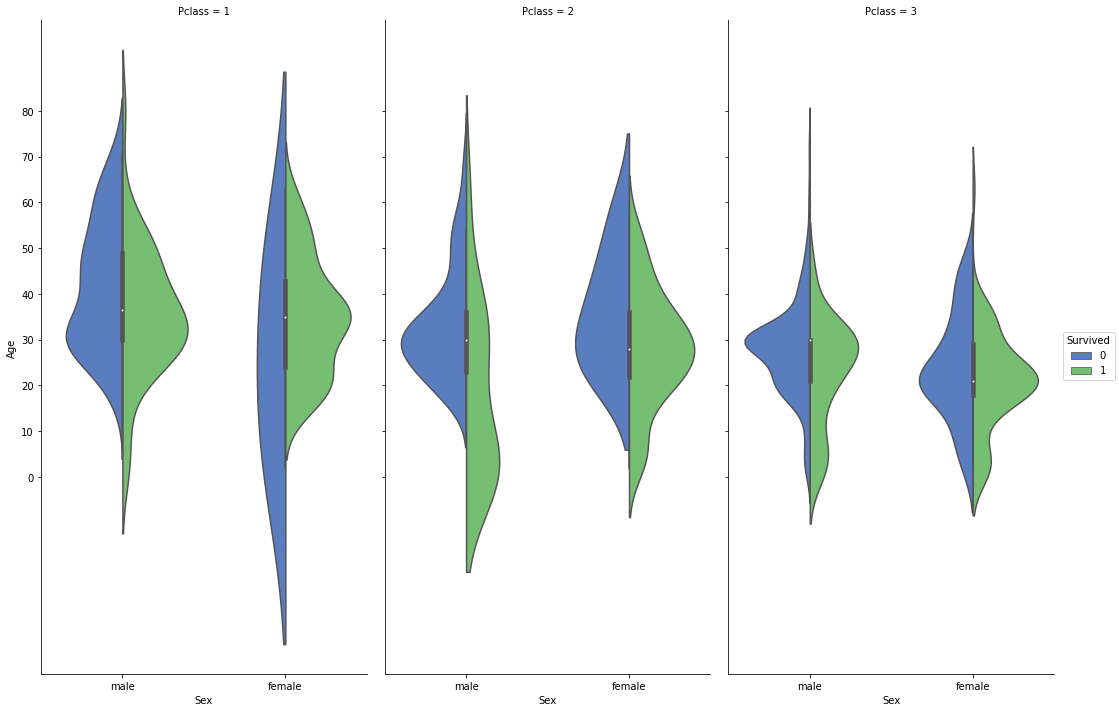

In [19]:
# starting with a visualization to show who survived based on their age, class and gender
# Ref: http://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.factorplot(data=updated_df, col='Pclass', x='Sex', y='Age', hue='Survived', 
               kind='violin', split=True, size=10, aspect=0.5, s=10, palette="muted")
plt.yticks(np.arange(0,81,10));

This shows that the survivality was higher in females and passengers in upper class. Let's dig deeper now into each element.

In [20]:
updated_df.groupby(["Sex","Pclass"]);

In [21]:
count_sex = updated_df['Sex'].value_counts()
count_sex

male      577
female    314
Name: Sex, dtype: int64

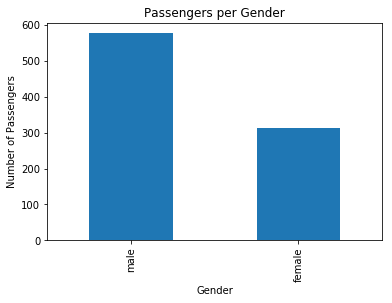

In [22]:
count_sex.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Passengers per Gender");

So, the number of males was almost double the number of females. Now, let's check if there was a differance 

In [23]:
survival_per_gender = updated_df.groupby('Sex')['Survived'].mean()
survival_per_gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

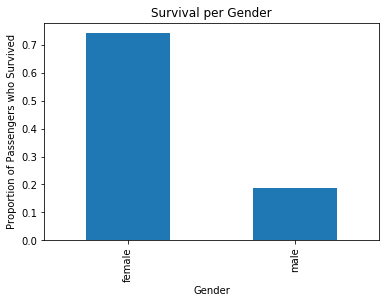

In [24]:
survival_per_gender.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Proportion of Passengers who Survived")
plt.title("Survival per Gender");

This shows that famales were more likely to survive, with 74%, which is much more than the survival rate for males (19%).

Now, let's check the Passengers Class, which indicates the financial status of passengers

In [25]:
survival_per_class = updated_df.groupby('Pclass')['Survived'].mean()
survival_per_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

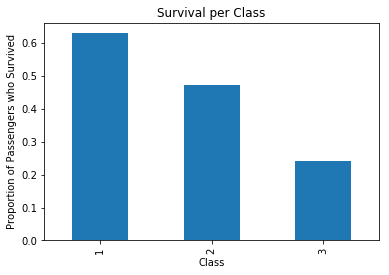

In [26]:
survival_per_class.plot.bar()
plt.xlabel("Class")
plt.ylabel("Proportion of Passengers who Survived")
plt.title("Survival per Class");

This shows that upper-class passengers were more likly to survive compared to lower-class. 
Now, let's combine the class with gender.

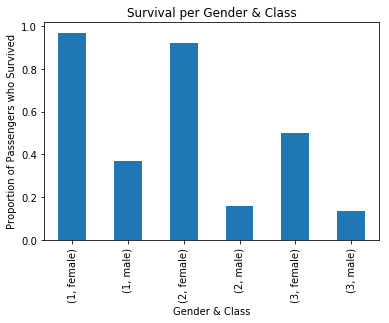

In [27]:
survival_per_gender_and_class = updated_df.groupby(['Pclass','Sex'])['Survived'].mean()
survival_per_gender_and_class.plot.bar()
plt.xlabel("Gender & Class")
plt.ylabel("Proportion of Passengers who Survived")
plt.title("Survival per Gender & Class");

This shows that almost all females in 1st and 2nd class survived. Even females in 3rd class had higher survivel rate compared to males in all classes. However, still the survivel of males in 1st class was higher compared to males in 2nd and 3rd class.

Now, let's move to studying passengers' age and its relation to survival.

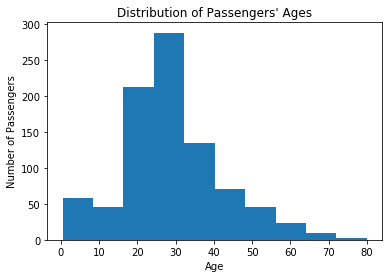

In [28]:
updated_df['Age'].plot.hist()
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passengers' Ages");

Most of the passengers were between the ages 20-30. 

I'll apply a function to seperate the children (15 y/o or less) and adults.

In [29]:
def categorize_age(age):
    """Categorize the passengers to two groups: children and adult"""
    if age <= 15:
        return 'Child'
    else:
        return 'Adult'

updated_df['AgeCategory'] = updated_df['Age'].apply(categorize_age)

In [30]:
survival_per_age = updated_df.groupby('AgeCategory')['Survived'].mean()
survival_per_age

AgeCategory
Adult    0.361940
Child    0.586207
Name: Survived, dtype: float64

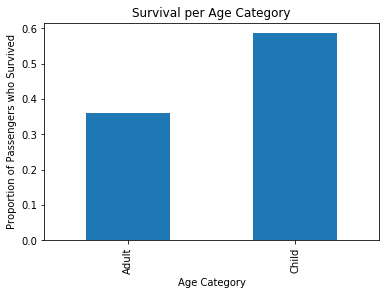

In [31]:
survival_per_age.plot.bar() 
plt.xlabel("Age Category")
plt.ylabel("Proportion of Passengers who Survived")
plt.title("Survival per Age Category");

So, this shows that children were more likely to be saved than adults, but it's still less than the difference between males and females.

Now, let's check the number of accompaning family members, where I'll aggregate the number of siblings/spouses and parents/children. 

In [32]:
updated_df['FamilyAboard'] = updated_df['SibSp'] + updated_df['Parch']

In [33]:
updated_df.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeCategory,FamilyAboard
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,S,Mr.,Adult,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q,Mr.,Adult,0
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,Mrs.,Adult,2
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,Mr.,Adult,0
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,S,Mr.,Adult,0
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,S,Mr.,Adult,0
46,47,0,3,"Lennon, Mr. Denis",male,30.0,1,0,370371,15.5000,Q,Mr.,Adult,1
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,S,Mrs.,Adult,0
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,S,Miss.,Adult,0
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,S,Mr.,Adult,0


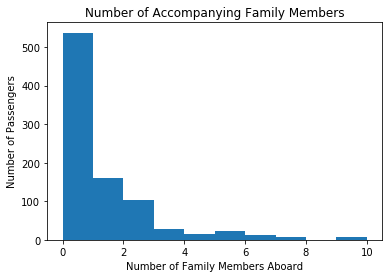

In [34]:
updated_df['FamilyAboard'].plot.hist()
plt.xlabel("Number of Family Members Aboard")
plt.ylabel("Number of Passengers")
plt.title("Number of Accompanying Family Members");

In [35]:
def Has_Family(FamilyAboard):
    """Categorize the passengers to two groups: the ones who are alone and the ones who has family members aboard"""
    if FamilyAboard == 0:
        return 'Alone'
    else:
        return 'With Family'

updated_df['HasFamily'] = updated_df['FamilyAboard'].apply(Has_Family)

In [36]:
updated_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeCategory,FamilyAboard,HasFamily
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Rev.,Adult,0,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Miss.,Adult,0,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.45,S,Miss.,Adult,3,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Mr.,Adult,0,Alone
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Mr.,Adult,0,Alone


In [37]:
survival_if_alone = updated_df.groupby('HasFamily')['Survived'].mean()
survival_if_alone

HasFamily
Alone          0.303538
With Family    0.505650
Name: Survived, dtype: float64

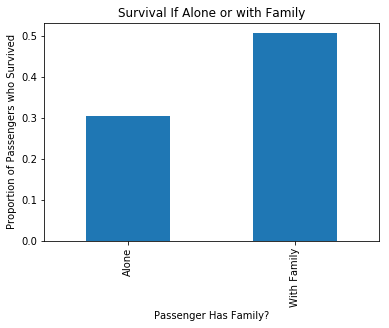

In [38]:
survival_if_alone.plot.bar()
plt.xlabel("Passenger Has Family?")
plt.ylabel("Proportion of Passengers who Survived")
plt.title("Survival If Alone or with Family");

There seems to be higher chance to survive if there are family members aboard, but the differance is less compared to gender, class and age.

## Conclusion Phase

Considering that the data represents only 40% of the full passengers and it has some missing elements and values, this limits the analysis to be tentative. So, the analysis shows that females, children and upper-class were more likely to survive.
Limiting the family members to siblings, spouses, parents and children seems to me a drawback because it doesn't give the full picture of the availability of companions to each passenger.
I'll be interested to come back to this data to analyze further the data using advanced statistical tests to measure the correlation between these variables and the survival rate. I will be also eager to, after studying machine learning, to take the Kaggle challenge.